# [Kaggle: Breast cancer analysis and prediction](https://www.kaggle.com/code/vincentlugat/breast-cancer-analysis-and-prediction/data)

**מגישים: אריה, טמיר, אביחי ושמואל**

<div dir="rtl">

# 1. הקדמה והצגת הבעיה

פרויקט זה כולל שימוש בdataset הנקרא "Breast Cancer Wiseconsin (Diagnostic) Dataset" המכיל 30 פיצ'רים ו-569 תצפיות המבוססים על תמונות שהופקו על ידי בדיקה הנקראת Fine Needle Aspiration. בדיקה זו מאפשרת לנו לחלץ את תכונות גרעין התא המופיע בתמונה.
אותם 30 הפיצ'רים מורכבים מ10 תכונות המהוות את הפיצ'רים הבסיסיים. אותה הרכבה מבוססת על פעולות של ממוצע, סטיית תקן והמצב הרע ביותר עבור כל תכונה. המשמעות במצב הרע ביותר היא הערך הספרתי עבור כל פיצ'ר המצביע על גידול סרטני פוטנציאלי.
Dataset זה מגיע יחד עם labels המצביעים על האם קיים גידול בתמונה, כאשר M מעיד על גידול בעוד B לא ולכן נממש מודל של supervised training.
מטרת הפרויקט הינה סיווג של האם קיים גידול סרטני או לא בהתבסס על סט הפיצ'רים הנתון תוך כדי שמירה על רמת דיוק גבוהה באמצעות המודל הנבחר.


</div>

<div dir="rtl">

# 2. ייבוא ספריות וקריאת הנתונים


> # 2.1. ייבוא הספריות
כבכל פרויקט יהיה עלינו לטעון את הספריות השימושיות.
לחישובים נומריים ואלגברה לינארית נטען את numpy.
את pandas נטען בכדי לעבוד עם dataframes וביצוע ניתוח נתונים מתקדם.
נעשה שימוש בספריית sklearn עבור שימוש ברגרסיה לוגיסטית ובעוד כלים בשביל fitting וטיוב המודל. 
נטען ספריות גרפיות כמו matplotlib ו-seaborn בכדי להציג גרפים שיעזרו לנו משלב הבנת הבעיה, הנדסת הפיצ'רים והEDA עד לשלב בניית המודל.





</div>

In [ ]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import pandas as pd  
import seaborn as sns 
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation
import itertools
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

<div dir="rtl">

> # 2.2. קריאת הנתונים
בכדי לקרוא את הנתונים נשתמש בספריית pandas ובפונקציית read_csv (מפני שזה הפורמט של הנתונים שלנו).
נפנה את פונקציית הקריאה אל הdataset שלנו באמצעות כתיבת URL המפנה לGitHub.
האמצעות פעולות אלו אנו יוצרים DataFrame (נקרא לו df) ובכך נוכל להמשיך ולממש עליו את הפעולות הבאות.
לבסוף נציג 10 תצפיות ראנדומליות מהdf וזאת בכדי להבין את התמונה הכוללת של הdataset.





</div>

In [ ]:
url = 'https://raw.githubusercontent.com/avihaibd/ds-python-ml-project/main/data.csv'
df = pd.read_csv(url)
df.sample(10) # show a random 10 rows of the data 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
363,9010872,B,16.500,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,...,25.45,117.20,1009.0,0.13380,0.16790,0.16630,0.09123,0.2394,0.06469,NaN
354,901011,B,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,...,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
252,885429,M,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,...,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970,NaN
355,9010258,B,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,...,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188,NaN
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,...,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938,NaN
458,9112594,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291,NaN
491,91376702,B,17.850,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.04178,...,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871,NaN
217,8811779,B,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,...,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809,NaN
133,867387,B,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,...,19.25,114.30,922.8,0.12230,0.19490,0.17090,0.13740,0.2723,0.07071,NaN


<div dir="rtl">

> # 2.3. השגת אינפורמציה על הdf
כעת נעשה שימוש במתודת הinfo שתפקידה לספק לנו מידע חיוני על כל פיצ'ר המוצג בdf. מידע חיוני זה כולל את מספר התצפיות, העמודות (פיצ'רים יחד עם ID והlabels), הdata type של כל פיצ'ר ואת מספר הערכים התקינים שאינם Nulls עבור כל פיצ'ר.
פה ניתן להסיק כי הפיצ'ר בשם "unnamed 32" אינו מכיל ערכים שאינם Nulls ולכן אנו חושדים כי אפשר להשמיטו מן הdf.





</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<div dir="rtl">

> ממצאים:
1. מערך הנתונים שלנו מכיל 569 תצפיות ו-30 פיצ'רים (לא כולל העמודה unnamed: 32 שהינה טעות שנמצאת בdataset). בנוסף קיימות עוד שתי עמודות שאחת מהן היא הID והשנייה נקראת "Diagnosis" והיא המשתנה המוסבר שלנו.
2. כל הפיצ'רים מכילים ערכים מסוג float בעוד המשתנה המוסבר שלנו הינו קטגוריאלי (object).





</div>

<div dir="rtl">

> # 2.4. חישוב ערכים חסרים
דרך נוספת להבין את מספר הערכים החסרים בכל פיצ'ר הינה שימוש במתודת "isnull" שתמצא עבור כל ערך בכל פיצ'ר האם הוא Null או לא, ולבסוף תסכום את כלל הNulls בכדי שנבין את כמות הערכים החסרים בכל פיצ'ר. גם כאן לא נופתע לגלות כי הפיצ'ר "Unnamed 32" מכיל **רק** ערכים חסרים. לאחר בדיקה בקובץ הCSV, ניתן להבחין כי לאחר העמודה ה31 מופיע פסיק, ובעקבות פסיק זה נוצרת לנו עמודה מספר 32 שהיא גם unnamed כי לא הוקצה שם לאחר אותו פסיק.
 אנו מבינים כי אפילו לא מדובר בפיצ'ר אלא בשגיאה בקובץ הנתונים ולכן נשמיט את אותה עמודה מהdf. 



</div>

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<div dir="rtl">


> # 2.5. השמטת עמודות לא רלוונטיות


> בשלב זה נרצה לנקות את הdf שלנו על פי המסקנות מהסעיפים הקודמים, כלומר, להשמיט את עמודת unnamed שנוצרה לנו עקב טעות בקובץ ה CSV ובנוסף נשמיט את עמודת ה"ID" שגם לא רלוונטית לאימון המכונה. השמטה זו נבצע באמצעות מתודת "drop" של ספריית ה"pandas":

</div>

In [ ]:
df = df.drop(['Unnamed: 32','id'],axis = 1)

<div dir="rtl">

# 3. EDA - חקירה ואנליזה של הנתונים
> # 3.1. המשתנה המוסבר
המשתנה המוסבר שלנו (נקרא גם משתנה מטרה) הוא הdiagnosis.
משתנה זה מהווה את מצב הפציינט. האם הוא בעל גידול ממאיר (Maligent) או לא ממאיר (Benign). 
בכדי לקבל פירוט על משתנה המטרה שלנו נקרא למתודה "value_counts" שתציג לנו את הערכים האפשריים של המשתנה יחד עם כמות הפעמים שכל ערך מופיע.
להלן ההיסטוגרמה של המשתנה המוסבר:

</div>

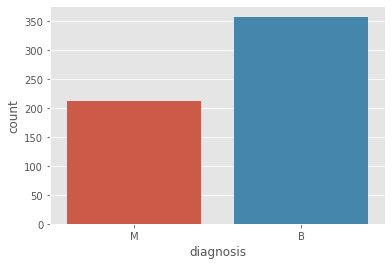

In [ ]:
sns.countplot(x = "diagnosis", data = df)

In [ ]:
import plotly.express as px
fig = px.pie(df['diagnosis'].value_counts(), names = ['Benign (שפיר)', 'Malignant (ממאיר)'], values='diagnosis', title='Distribution of diagnosis variable')
fig.update_layout(legend=dict(x=0.72), title=dict(xanchor='center', x=0.5))
fig.update_traces(textinfo='percent+label')
fig.show()



<div dir="rtl">

>יש לנו סה"כ 569 מטופלים שנמצאים במחקר, בניהם 212 כאלה שנמצא אצליהם גידול ממאיר, ו 357 שהגידול שלהם לא היה ממאיר (37.3%). אחוז זה יחסית בסדר. במידה ואחוז התצפיות של הגידולים הממאירים היה נמוך, היה עלינו להתחשב בכך וליישם מטריקת מדידה נכונה למקרה זה (הרי שימוש בaccuracy יניב לנו תוצאות מטעות) אבל בכל אופן הdataet שלנו מאוזן מה שמאפשר שימוש במדד הaccuracy.

> מהתוצאות שהתקבלו מעלה אנו מבינים כי משתנה המטרה שלנו הינו קטגוריאלי. יש לקחת בחשבון שתחום למידת המכונה עושה שימוש בערכים מספריים ולא במחרוזות ויהיה עלינו להמיר את המשתנה המוסבר אל ערכים מספריים בהמשך. נבצע את ההמרה בחלק הנדסת הפיצ'רים.

</div>



---



---



<div dir="rtl">

> # 3.2. בדיקת נתונים סטטיסטיים של הפיצ'רים
הניתוח שביצענו עד כה מביא לנו את התמונה הגדולה, כעת נרצה לצלול טיפה יותר לעומק ולבדוק את הנתונים הסטטיסטיים של הפיצ'רים.

> נשתמש במתודה "describe" ונקבל:



</div>



In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<div dir="rtl">

> ברשותינו טבלה שמאפשרת לנו להבין את כמות הנתונים בכל פיצ'ר, מדדים סטטיסטיים הכוללים את הממוצע, סטיית התקן, אחוזונים וערכי המקסימום.


> ניתן לראות כי לעיתים רחוקות ערך המקסימום נראה כמאוד גבוה מהערך הממוצע (לדוגמה בפיצ'ר בשם area_mean) אך איננו רוצים לתת לזה להיות כלל האצבע שלנו בהשמטת פיצ'רים מכיוון שהdataset שלנו לא גדול במיוחד ובמקרה של סיווג בין גידול ממאיר ללא ממאיר קיימת משמעות חשובה לערכי קיצון, אשר יכולים להוות את הגבול בין החלטה כזו לאחרת. אז כעת נמתין עם השמטת הפיצ'רים ונבצע אותה בהמשך לאחר בדיקות נוספות.

</div>



<div dir="rtl">

> # 3.3. הצגת נתונים חריגים


> כבכל מודל למידת מכונה, ערכים חריגים יכולים להועיל או להוריד מתפקוד אלגוריתם למידת המכונה. הדבר הראשון שעלינו לחשוב עליו הוא- האם הנתונים החריגים חשובים לנו? או שאולי שווה לטפל בהם. במקרה של הפרויקט שלנו- קיימת משמעות לערכים החריגים- הרי ערך חריג יוכל להיות זה שבסופו של דבר יקבע את ההחלטה האם למטופל יש או אין גידול, ולכן הרצון שלנו יהיה לשמור את אותם ערכים חריגים כי הם מכילים אינפורמציה חשובה. לדוגמה- רדיוס ממוצע גבוה יוכל להעיד על שינוי בתכונות גרעין התא.

> בטבלה מעלה ניתן להבין אילו פיצ'רים מניבים ערכים חריגים וזאת על ידי ההסתכלות על הערך הממוצע ליד הערכים המינימאלים והמקסימלים. נייצר boxplots עבור אותם פיצ'רים בהם אנו חושדים: area_mean, area_worst. נעשה שימוש בספרית "matplotlib" בשביל ייצוא הגרפים של הboxplot:











</div>

Text(0, 0.5, 'value')

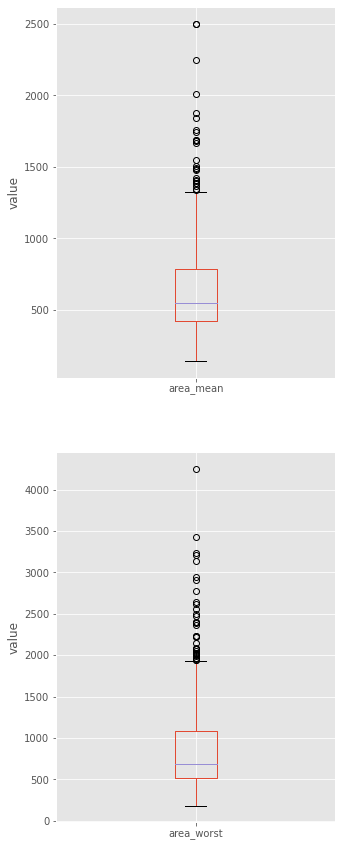

In [ ]:
plt.figure(figsize=(5,15))


plt.subplot(2, 1, 1)
fig = df.boxplot(column='area_mean')
fig.set_title('')
fig.set_ylabel('value')

plt.subplot(2, 1, 2)
fig = df.boxplot(column='area_worst')
fig.set_title('')
fig.set_ylabel('value')

<div dir="rtl">

> כמו שציפינו, לפי הboxplot אפשר לראות ערכים חריגים (על פי הנקודות השחורות שיוצאות מתחומי הbox).











</div>

<div dir="rtl">



> # 3.4. הפיצ'רים





> כמו שהוסבר בהתחלה, בdataset יש לנו 30 פיצ'רים (ללא ההתייחסות למשתנה המטרה ול-ID).
את הפיצ'רים השיגו מניתוח מספר תמונות שנסרקו מהמטופל כך שכל תצפית כוללת פיצ'רים שהוצאו ממספר תמונות. 30 הפיצ'רים מבוססים על 10 פיצ'רים בסיסיים שבכל קבוצה מקבלים משמעות מעט שונה. בקוד מטה ניתן לראות את אותם פיצ'רים בסיסיים ואת השוני ביניהם בכל קבוצה. קבוצת הפיצ'רים הראשונה הינה הממוצעים, השניה היא סטיות השגיאה והשלישית הינה התוצאות הרעות ביותר (שמקרבות את הפציינט להחלטה של גידול ממאיר).


> עכשיו אנחנו נגשים לטפל במשתנים המסבירים. נציג רק את שמות הפיצ'רים באמצעות המתודה "columns":

</div>





In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<div dir="rtl">

> נסווג לשלושת הקבוצות המתוארות מעלה.
</div>





<div dir="rtl">

> קבוצה אחת של כל הממוצעים שנאספו מהתצלומים של המטופלים  (נתחיל מעמודה 1 בכדי לא להכליל את הID והמשתנה מטרה):
</div>


In [ ]:
df_mean=df.iloc[:,1:11]

<div dir="rtl">

> קבוצה נוספת של טעות התקן שלהם (סטיית התקן לחלק לשורש התצפיות של כל מטופל):
</div>



In [ ]:
df_se = df.iloc[:,11:21]

<div dir="rtl">

> והקבוצה האחרונה היא בעצם הערך הגרוע (והמסוכן) ביותר של כל פיצ'ר עבור כל מטופל:
</div>



In [ ]:
df_worst = df.iloc[:,21:]

<div dir="rtl">



> # 3.5. התפלגות הממוצעים


> כעת נרצה להבין טוב יותר אילו פיצ'רים מפריעים לנו לקבלת המודל הטוב ביותר. נתחיל בהצגת ההיסטוגרמות של קבוצת הממוצעים. את ההיסטוגרמות נייצר באמצעות הפעלת מתודת ההיסטוגרמה "hist" על קבוצת הממוצעים "df_mean":
</div>



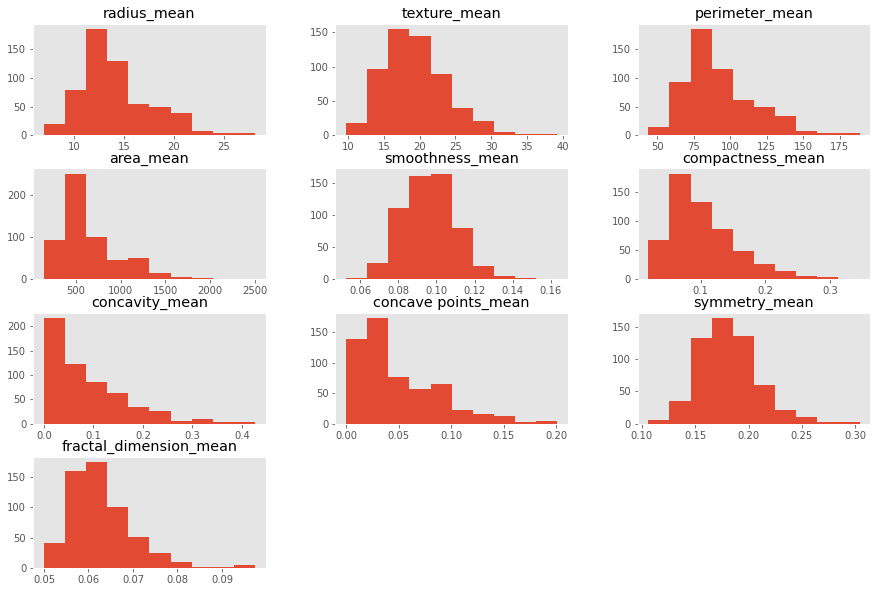

In [ ]:
hist_mean = df_mean.hist(bins=10, figsize=(15, 10),grid=False)

<div dir="rtl">

> אנו למדים מהיסטוגרמות אלו את ההתפלגות של כל ממוצע. מה שעומד לנו בקנה אחד יחד עם הניתוח הסטטיסטי שביצענו קודם. בנוסף ניתן לראות כי ההתפלגות הנצפית ברוב הגרפים היא בקירוב ההתפלגות הנורמאלית. עניין זה חשוב מכיוון שבשלבים המתקדמים כשנרצה לנרמל את הנתונים נוכל להתבסס על סוג נרמול על פי התפלגות נורמאלית. במקרה שלנו קיימים גם פיצ'רים עם התפלגויות אחרות ולכן נעבוד בשיטת הMinMax אבל כל זה בהמשך.
</div>



<div dir="rtl">



> # 3.6. מולטי קורלציה של קבוצת הממוצעים


> דרך טובה מאוד להבין את ההשפעה של פיצ'ר אחד עם השני הוא לתאר את הקורלציה שלהם בצורה גרפית. באם נצפה בשני פיצ'רים שהקורלציה ביניהם גבוהה, נבין כי ההשפעה שלהם יותר תזיק מאשר תתרום למודל שלנו. אנו רוצים ללמד את המכונה את אותם הדפוסים המיוחדים של פיצ'רים שאינם משפיעים על הפיצ'רים האחרים. כך נוכל לבנות מודל חזק עם הפיצ'רים ההכרחיים שלא יטו את תוצאות אימון המכונה. בשביל לבחון זאת ניצור גרפים שיציגו את הקורלציה בין כלל הפיצ'רים בקבוצה יחד עם הground truth של כל תצפית ובכך נוכל להבחין בדפוס של פיצ'ר כתלות במשתנה המטרה יחד עם ההבנה של האם הפיצ'רים נמצאים בקורלציה גבוהה- הרי אם נבחין שהתצפיות של פיצ'ר אחד "עולות" על התוצאות של פיצ'ר אחר נדע כי יש ביניהם קורלציה. בשביל להציג את הגרפים נעשה שימוש במתודת "pairplot" של ספריית "seaborn".
</div>



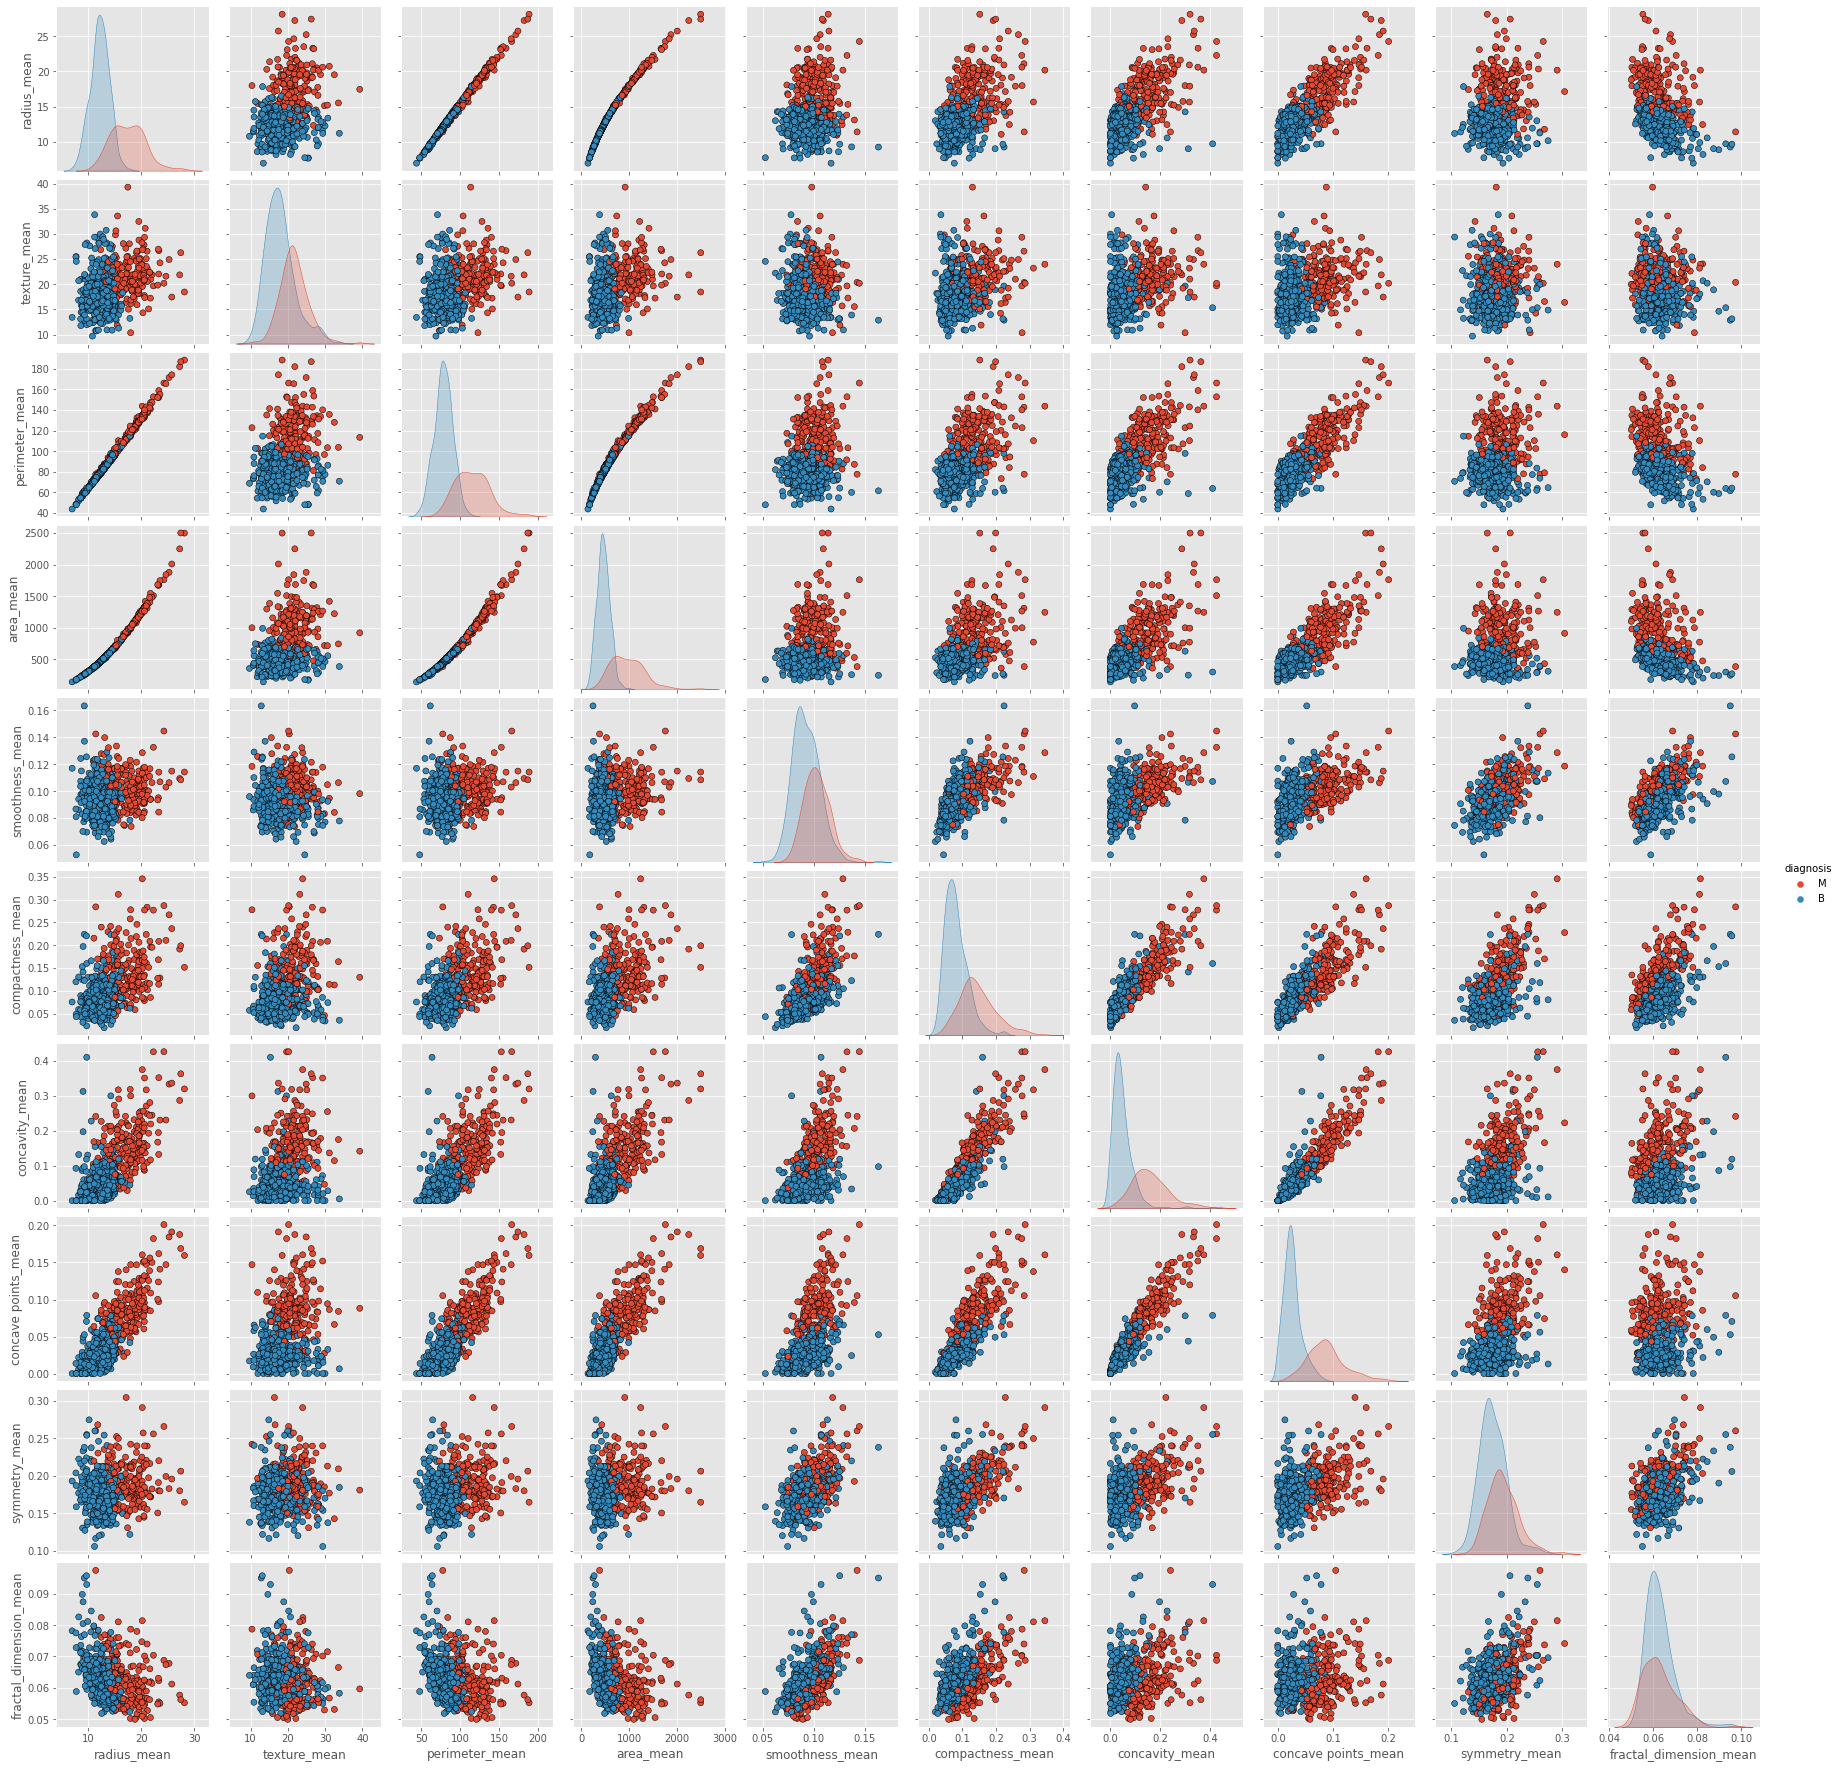

In [ ]:
pp_mean = sns.pairplot(df[df.columns[0:11]], hue = "diagnosis", plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

<div dir="rtl">

> מולטי קורולציה בין הממוצעים, כאשר אנחנו יכולים לראות באיזה איזורים בקורולציות השונות יש יותר חולים ואיפה יש מעט חולים.

> ניקח לדוגמה את radius_mean ואת perimeter_mean. ניתן לראות לפי הגרף שקיימת קורלציה ביניהם (תצפיות משנ הפיצ'רים עולות אחת על השניה). הדבר מסתדר גם עם ההיגיון- הרי יש קשר ישיר בין רדיוס אל היקף! אנו מניחים כי תמונת הגידול קרובה במובן מסויים אל צורת המעגל ולכן קיים הקשר P = 2 * pi * r. 

> מצד שני נסתכל על "smoothness_mean" ליד "perimeter_mean"- כאן ניתן לראות בבירור שקיים דפוס. מהערך ~95 של היקף נוכל לראות כי כלל התצפיות מסווגות כגידולים ממאירים. גרפים אלו עזרו לנו להבין מתי קיימת קורלציה ומהם הדפוסים, אך כעת נרצה להיעזר בערך מספרי בכדי להגדיר סף מסויים שאם אחוזי הקורלציה של הפיצ'ר עוברים אותו, נגדיר את אותו הפי'צר כ"highly correlated".

> ניצור דיאגרמת חום מספרית שתציג לנו את אחוזי הקורלציה בין פיצ'רים. נזכיר כי בין אם הערך מתקרב ל1 או 1- זה אומר שקיימת קורלציה גבוהה (חיובית או שלילית). נזכור גם כי האלכסון מציג את הקורלציה של הפיצ'ר עם עצמו ובגלל זה נבחין בקורלציה גבוהה במיקומים אלו.

</div>

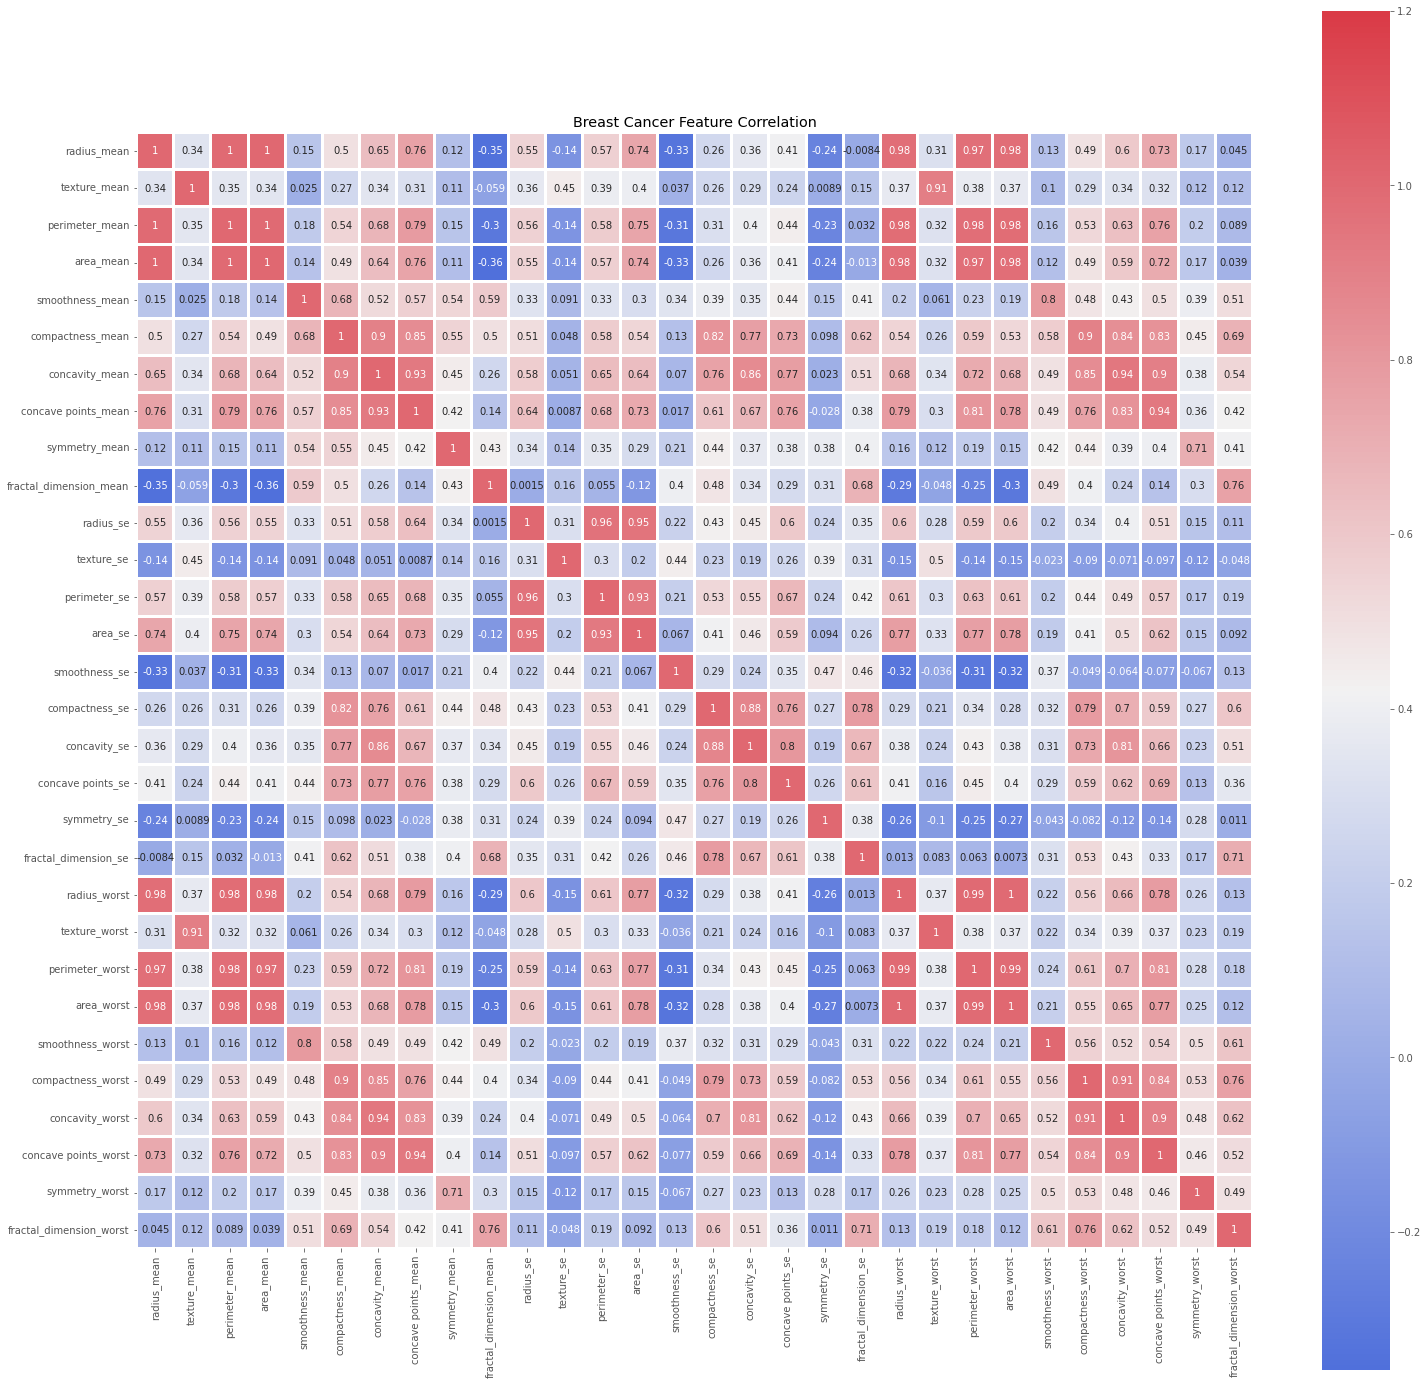

In [ ]:
plt.figure(figsize=(25, 25))
plt.title('Breast Cancer Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df.corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, linewidths=2)



<div dir="rtl">

> מולטי קורולציה בין המסבירים השונים - כאשר החלק החשוב כאן שישנה קורולציה כמעט מוחלטת בין הרדיוס ההיקף והשטח של הגידול , בנוסף יש קורולציה גבוהה בין העקימות לבין הקעירות של הצורה, ולכן נשתמש רק באחד מהמסבירים האלה, כדי להוריד דרגות חופש מהמודל.

</div>


<div dir="rtl">

> ניצור פונקציה שמקבלת את הקורוצליות בין המסבירים לפי ספירמן + נקודת סף שבמידה ומסביר עובר אותה הוא יירשם ב"col_corr" בכדי שבעצם ניצור רשימה של פיצ'רים שמוגדרים כ"Highly Correlated".


</div>

In [ ]:
# With the following function we can select highly correlated features
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


<div dir="rtl">



> נקבע את סף ההחלטה ל75% ונפעיל את הפונקציה שבנינו על כל שלושת הקבוצות. נשמור את תוצאות הסינון במשתנים מטה. נפעיל את פונקציית ה"display" בכדי להבין אילו פיצ'רים לא עמדו במבחן הסינון:




</div>

In [ ]:
corr_features_mean = correlation(df_mean, 0.75)
corr_features_se = correlation(df_se, 0.75)
corr_features_worst = correlation(df_worst, 0.75)

display(corr_features_mean, corr_features_se, corr_features_worst)

{'area_mean', 'concave points_mean', 'concavity_mean', 'perimeter_mean'}

{'area_se',
 'concave points_se',
 'concavity_se',
 'fractal_dimension_se',
 'perimeter_se'}

{'area_worst',
 'concave points_worst',
 'concavity_worst',
 'fractal_dimension_worst',
 'perimeter_worst'}


<div dir="rtl">

> מסקנות מסעיף הקורולציה:


> 1) פיצ'ר השטח הממוצע של גרעין התא נמצא בקורלציה חיובית גבוהה עם הערכים הממוצעים של הרדיוס וההיקף. דבר שגם ההיגיון יכול להסביר.  
> 2) פיצ'רים מסויימים כמו הגבשושיות הממוצעת והשטח הממוצע, נמצאים בקורלציה בינונית (בין 50%-70%) אך הם לא מהווים לנו סכנה ממשית למודל.  
> 3) ניתן להבחין בנוסף גם לפיצ'רים הנמצאים בקורלציה שלילית גבוהה אחד עם השני כמו fractal_dimension עם טקסטורה.

</div>



<div dir="rtl">

# 4. עיבוד מקדים והנדסת תכונות

חלק העיבוד המקדים והנדסת התכונות (או באנגלית, Feature Engineering) מהווה קבוצת פקודות שמטרתן קבלת הנתונים והפיכתם אל נתונים אשר מודל למידת המכונה שלנו יפיק מהן יותר תועלת, לדוגמה, שינוי ערכים חסרים שעשו דרכם אל תוך פיצ'ר מסויים אל נתונים אמיתיים על בסיס מציאת השכיח. הכנה מוקדמת זו משפרת את יכולת הניבוי של המודל שנבנה בהמשך.

במקרה שלנו, אין לנו ערכים חסרים בתוך הפיצ'רים.
בנוסף נציין כי אין לנו שימוש בערכים קטגוריאליים מלבד משתנה המטרה- אותו נשנה לערכים מספריים בסעיף הבא בשביל פשטות המודל (כפי שציינו קודם, למידת מכונה עושה שימוש במספרים). במידה והיו לנו במודל נתונים חסרים היה עלינו להבדיל בין הערכים הקטגוראליים לנומרים מפאת דרך הטיפול השונה.

</div>


<div dir="rtl">

> # 4.1. המרת ערכי משתנה המטרה
כפי שציינו בסעיפים הקודמים. בלמידת מכונה נעשה שימוש במספרים ולכן מטרתנו תיהיה שינוי הערכים הקטגוריאליים לנומרים. בדרך כלל השימוש יהיה במתודת get_dummies לפטירת הבעיה אך אצלנו המשתנה הקטגוריאלי היחיד הינו משתנה המטרה שגם מונה 2 קטגוריות, ולכן, נשמתמש בLabelEncoder בשביל המרת הערכים הקטגוריאליים של משתנה המטרה מ"M" ו"B" ל"1" ו"0".

</div>



In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df['diagnosis'])


<div dir="rtl">

> # 4.2. הערכת הקשר בין המסבירים למוסבר


> בסעיף זה נרצה לבחון את הקשר בין המוסברים למוסבר. נבדוק את מידת המובהקות של כל פיצ'ר בהקשר למשתנה המוסבר. בחרנו להגדיר את ערך הPValue שמבחינתנו מהווה את הסף בין מובהקות ללא מובהקות כ0.05. במידה והPValue של מסביר מסויים יהיה מעל ערך הסף, נבין כי רמת המובהקות לא מספקת ובכך נגרוס כי לא קיים קשר בין המסביר למוסבר. ניצור רשימה בשם coldrop שתאגור אליה את כלל הפיצ'רים שללא קשר למשתנה המוסבר. בקוד הבא חישבנו את ערכי הPvalue בעזרת הספריה Scipy תחתה קיימת תת ספרייה בשם stats.


</div>



In [ ]:
# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df_anova = df.iloc[:,0:]
grps = pd.unique(df_anova.diagnosis.values)

coldrop = []

for i in range(1, len(df_anova.columns)):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.diagnosis == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and diagnosis".format(df_anova.columns[i]), p)

    if p > 0.05:
        print("There is no relation between {} and diagnosis \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

print(coldrop)

P_Value of radius_mean and diagnosis 8.465940572263339e-96
P_Value of texture_mean and diagnosis 4.0586360478986136e-25
P_Value of perimeter_mean and diagnosis 8.43625103617395e-101
P_Value of area_mean and diagnosis 4.734564310307994e-88
P_Value of smoothness_mean and diagnosis 1.051850359203376e-18
P_Value of compactness_mean and diagnosis 3.938263105887557e-56
P_Value of concavity_mean and diagnosis 9.966555755074321e-84
P_Value of concave points_mean and diagnosis 7.101150161059557e-116
P_Value of symmetry_mean and diagnosis 5.73338402846732e-16
P_Value of fractal_dimension_mean and diagnosis 0.7599368037255626
There is no relation between fractal_dimension_mean and diagnosis 

P_Value of radius_se and diagnosis 9.738948656462521e-50
P_Value of texture_se and diagnosis 0.8433320287670788
There is no relation between texture_se and diagnosis 

P_Value of perimeter_se and diagnosis 1.6519051758498407e-47
P_Value of area_se and diagnosis 5.895521392606798e-46
P_Value of smoothness_se 


<div dir="rtl">

> # 4.3. מציאת פיצ'רים בעלי הטייה נמוכה


> דבר נוסף שחשוב לשים לב אליו, הוא הvariance (הטייה) של הפיצ'רים. הרי אם נחשוב על זה לעומק, פיצ'ר שמכיל את פחות או יותר אותם הערכים לא ילמד את המודל משהו חשוב, הרי מתקבלת אותה התוצאה לא משנה באיזו תצפית מדובר ולכן- המטרה תיהיה לברר אילו פיצ'רים בעלי הטייה מאוד נמוכה. נבצע בדיקה זו באמצעות תת הספרייה VarianceThreshold.






</div>



In [ ]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)
var_thres.get_support()

print(df.columns[var_thres.get_support()])


constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
[]
0



<div dir="rtl">


> # 4.4. רשימת הפיצ'רים הבעיתיים המלאה



> ניתן לראות כי בקוד מעלה ניסינו לשמור את הפיצ'רים עם הערכים הדומים תחת רשימת constant_columns אבל לשמחתנו לא נמצאו פיצ'רים כאלה.


> עכשיו ניתן ליצור רשימה אחת שתרכיב את כלל הפיצ'רים שלפי בדיקותינו נמצאו בעיתיים ולא יעילים לאימון המודל:








</div>



In [ ]:
corr_features_mean = list(corr_features_mean)
corr_features_se = list(corr_features_se)
corr_features_worst = list(corr_features_worst)

list_drop = corr_features_mean + corr_features_se + corr_features_worst + coldrop
list_drop = list(set(list_drop))
list_drop

['texture_se',
 'fractal_dimension_worst',
 'area_worst',
 'fractal_dimension_mean',
 'concavity_se',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'smoothness_se',
 'symmetry_se',
 'perimeter_worst',
 'area_mean',
 'concave points_mean',
 'concave points_worst',
 'concave points_se',
 'area_se',
 'fractal_dimension_se',
 'concavity_mean']


<div dir="rtl">


> לסיכום, מצאנו 18 פיצ'רים בעיתיים על פי הבדיקות הבאות:





> 1. בדיקת קורולציה
> 2. חסור מובהקות בין המסבירים למוסבר
> 3. הטייה נמוכה 

</div>




<div dir="rtl">


> # 4.6. PCA

> PCA (Principal Component Analysis) הינה שיטה לא מפוקחת (unsupervised) שתפקידה למצוא את ההטיה המוסברת (explained variance) של פיצ'רים. ככל שהשונות המוסברת של פיצ'ר יותר גדולה- משמע שהפיצ'ר משמעותי יותר למודל ומכיל יותר מידע. הPCA בעצם לוקח את הפיצ'רים המשמעותיים ביותר ומאחד אותם לכדי קומפוננטות המהוות כל אחת אחוז מתוך השונות המוסברת הכללית של כלל 30 הפיצ'רים. במסגרת אלגוריתם זה אנו בוחרים את מספר הקומפוננטות אותן ייצור הPCA (בחרנו 6 קומפוננטות) ועל פי כך נבחין בהתפלגות אחוזי השונות המוסברת של כל קומפוננטה. במסגרת פרויקט זה לא ניכנס לתאוריה מאחורי הPCA אבל כן נציג גרף עוגה שיתאר את השונות המוסברת של 6 קומפוננטות.


> לפני שמפעילים את הPCA על הדאטה שלנו יש לנרמלו בכדי שיתקיים איזון מבחינת משקל של כל פיצ'ר. נשתמש בStandardScaler המשתייך לsklearn, תוך כדי בחירת מנרמל הStandardScaler.
 נשתמש ב"sklearn" בשביל להעלות את תת הספריה "PCA" בה יש פונקציות מובנות שעל ידן נבצע את החישובים הנדרשים:







</div>



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain
import plotly.graph_objs as go
import plotly.offline as py

target_pca = df['diagnosis']
data_pca = df.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [ ]:
var_pca = pd.DataFrame(pca.explained_variance_ratio_, columns=data_pca.columns(axis=1))
# all_features
# pca.explained_variance_ratio_[:]
# df.columns.drop("diagnosis").values

In [ ]:
#explained_variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

#----------SUM AND DROP COMP [6:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
# col_names = [ df.columns]
# print(pca.get_feature_names_out(pca.feature_names_in_))
# labels = [var_pca.feature_names_in_[i] for i in var_pca.columns]
var_pca = var_pca.T

labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7-30']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)




<div dir="rtl">


> ניתן לראות כי חילקנו את 30 הפיצ'ירם לכדי סך הכל 30 קומפוננטות שונות. כל קומפוננטה מכילה קומבינציה של כמה וכמה פיצ'רים שקשה לדעת אילו. מה שכן נתן להבין ש6 קומפוננטות (כל השטח חוץ מהשטח הלבן) מכילות 88.8% מהשונות המוסברת וכי 24 הקומפוננטות האחרות מכילות יחד 11.2%. מה שאומר שניתן לעבוד עם 6 קומפוננטות אלו בשביל להסביר את כלל הפיצ'רים. דבר מדהי םזה מהווה פעולה מאוד חיונית שהPCA מבצע שהיא הורדה במימדים. מ30 פיצ'רים הגענו ל6 קומפוננטות.



</div>


<div dir="rtl">


> # 4.7. פיצול המוסבר מהמסבירים

> כעת נבקש להפריד בין המוסבר למסבירים. הרי לפי התאוריה, שלל האלגוריתמים מפרידים את המסבירים לX ואת המוסבר לy ולכן נבצע זאת בקוד הבא:




</div>



In [ ]:
X = df.drop( "diagnosis", axis=1)
y = df.diagnosis


<div dir="rtl">


> # 4.8. נרמול המסבירים



> רוב המודלים בלמידת מכונה עובדים טוב יותר כאשר מנרמלים את המסבירים, ובכך מביאים את זה לאותו קנה-מידה. הרי אם נחשוב על זה, לא נרצה שבהתהליך הלמידה, המכונה תייחס יותר חשיבות למסביר אחד על אחר רק בגלל שהמספרים אצלו בקנה מידה גדול יותר לדוגמה מחיר דירה שנמדד במאות אלפים ליד מספר החדרים.
נשתמש בStandardScaler המשתייך לsklearn, תוך כדי בחירת מנרמל הStandardScaler.
יש לשים לב כי בחרנו בStandardScaler מכיוון שהוא מתבסס על פיצ'רים שמפולגים יחסית באופן נורמאלי מה שתואם למקרה שלנו. הmean של כל פיצ'ר ישאף ל0 כשסטיית התקן תשאף ל1.



</div>



In [ ]:
scaler = StandardScaler()
cols = X.columns
NormalizedX = scaler.fit_transform(X)
NormalizedX = pd.DataFrame(NormalizedX, columns=cols)
NormalizedX.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00



<div dir="rtl">


# 5. הגדרת פונקציות לקראת האימון




> # 5.1. Confusion Matrix ומדדים


> הConfusion Matrix הינה מטריצה המאגדת יחד את תוצאות חיזוי המודל, כלומר, כמה הצלחות חיזוי יש לנו ליד כמה שגיאות. עצם השימוש בconfusion matrix חושף אותנו לארבעה מושגים חשובים:



> True Positive - כמות הפעמים בה חזינו "1" כאשר הground truth היה "1"

> True Negative- כמות הפעמים בה חזינו "0" כאשר הground truth היה "0"

> False Positive- כמות הפעמים בה חזינו "1" כאשר הground truth היה "0"

> False Negative- כמות הפעמים בה חזינו "0" כאשר הground truth היה "1"



> ניצור פונקציה שלנו בשביל הצגת הconf matrix. לפונקציה נכניס את פרמטר cm בהמשך שמהווה את הconf matrix. הפונקציה תציג בנוסף את הערכים אותם הזכרנו מעלה, תוך כדי חישוב של ארבעת המדדים המרכזיים:

> Accuracy-דיוק המודל, מוגדר כ- (TP + TN + FP + FN) / (TP+TN)

> Precision- מוגדר כ- TP / (TP+FP)

> Recall- מוגדר כ- TP / (TP+FN)

> F1 Score- מדד המשלב בין הPrecision לRecall באמצעות הממוצע ההרמוני שלהם



> בחירת המדד הרלוונטי חשובה ביותר, הרי לא נרצה להשתמש במדד דיוק כאשר בסט האימון קיימים לדוגמה רק 1% של "1" ו99% של "0" כי אז מסווג שיסווג הכל כ"0" ללא מחשבה, יקבל דיוק של 99%.


</div>



In [ ]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics(cm):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))


<div dir="rtl">


> # 5.2. עקומת Precision VS Recall



> ישנם פעמים שנרצה לשרטט עקומה של שני המדדים Precision ו-Recall. ההתנהגות שלהם שונה מכיוון שPrecision מצביע על אחוז התוצאות הרלוונטיות כאשר הRecall מצביע על אחוז התוצאות הרלוונטיות שסווגו בהצלחה על ידי המודל.



> נשתמש במתודת step של ספריית pyplot בשביל לייצר את הגרף.




</div>



In [ ]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [ ]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [ ]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [ ]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [ ]:
# Train_test split
from sklearn.model_selection import train_test_split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(NormalizedX, y, test_size = 0.12, random_state = random_state)


In [ ]:
X_train.describe()

In [ ]:
y_train.describe()

count    500.000000
mean       0.378000
std        0.485373
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


**מכאן זה המשך של קוד אחר**

---



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier

RF_Model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [ ]:
RF_Model.fit(X_train, y_train)# now fit our model for traiing data

RandomForestClassifier()

In [ ]:
from sklearn import metrics
RF_prediction=RF_Model.predict(X_test)
metrics.accuracy_score(RF_prediction,y_test)

0.9710144927536232

In [ ]:
featimp = pd.Series(RF_Model.feature_importances_,index=X.columns).sort_values(ascending=False)
featimp.head(RF_Model.n_features_) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.



concave points_mean        0.156568
concave points_worst       0.143862
radius_worst               0.142985
perimeter_worst            0.096328
area_worst                 0.066208
concavity_worst            0.049696
area_se                    0.048101
concavity_mean             0.034645
perimeter_mean             0.031858
area_mean                  0.027649
radius_mean                0.025942
texture_worst              0.020467
smoothness_worst           0.016070
radius_se                  0.015209
compactness_worst          0.014395
perimeter_se               0.012296
symmetry_worst             0.012056
texture_mean               0.011295
compactness_mean           0.011246
concavity_se               0.010881
texture_se                 0.007799
fractal_dimension_worst    0.006219
fractal_dimension_se       0.005886
fractal_dimension_mean     0.005522
smoothness_se              0.005352
compactness_se             0.004853
smoothness_mean            0.004665
symmetry_se                0

SVM

In [ ]:
SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)
SVM_prediction=SVM_model.predict(X_test)
metrics.accuracy_score(SVM_prediction,y_test)

0.9855072463768116

**חוזרים לקוד הרגיל**

---



In [ ]:
# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


Model Building
Logistic Regression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
def lr_grid_search(X, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    return grid_result.best_params_

In [ ]:
lr_grid_search(X_train, y_train)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
lr =LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.96      0.98        23

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Accuracy: 0.9855072463768116
Precision: 1.0
Recall: 0.9565217391304348
0.988
0.9855072463768116
